In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv("../../../csv/v2/060_yonge_flow_processed.csv.zip")

In [3]:
df["collectedAt"] = pd.to_datetime(df["collectedAt"], utc=True)
df["collectedAt"] = df.collectedAt.dt.floor(freq="s")
df["year"] = df["collectedAt"].dt.year
df["month"] = df["collectedAt"].dt.month
df["day"] = df["collectedAt"].dt.day
df["hour"] = df["collectedAt"].dt.hour
df["dow"] = df["collectedAt"].dt.day_of_week
df["dow_name"] = df["collectedAt"].dt.day_name()
df["month_name"] = df["collectedAt"].dt.month_name()
df["year_month"] = df["collectedAt"].dt.to_period("M").astype(str)
df["year_month_day"] = df["collectedAt"].dt.to_period("D").astype(str)

/tmp/ipykernel_40616/3071565371.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year_month"] = df["collectedAt"].dt.to_period("M").astype(str)
/tmp/ipykernel_40616/3071565371.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year_month_day"] = df["collectedAt"].dt.to_period("D").astype(str)


In [4]:
df.head()

,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,coordinates,collectedAt,year,month,day,hour,dow,dow_name,month_name,year_month,year_month_day
0,10,18,100,56,False,"[{'latitude': 43.646886954993356, 'longitude':...",2022-07-14 12:45:00+00:00,2022,7,14,12,3,Thursday,July,2022-07,2022-07-14
1,13,17,77,59,False,"[{'latitude': 43.646886954993356, 'longitude':...",2022-07-14 12:51:44+00:00,2022,7,14,12,3,Thursday,July,2022-07,2022-07-14
2,18,18,56,56,False,"[{'latitude': 43.646886954993356, 'longitude':...",2022-07-14 12:55:27+00:00,2022,7,14,12,3,Thursday,July,2022-07,2022-07-14
3,13,18,77,56,False,"[{'latitude': 43.646886954993356, 'longitude':...",2022-07-14 13:00:00+00:00,2022,7,14,13,3,Thursday,July,2022-07,2022-07-14
4,14,17,72,59,False,"[{'latitude': 43.646886954993356, 'longitude':...",2022-07-14 13:05:00+00:00,2022,7,14,13,3,Thursday,July,2022-07,2022-07-14


In [5]:
speeds_and_times_df = df[["currentSpeed","currentTravelTime","freeFlowSpeed","freeFlowTravelTime", "hour"]]
speeds_and_times_df

,currentSpeed,currentTravelTime,freeFlowSpeed,freeFlowTravelTime,hour
0,10,100,18,56,12
1,13,77,17,59,12
2,18,56,18,56,12
3,13,77,18,56,13
4,14,72,17,59,13
...,...,...,...,...,...
73530,10,100,17,59,21
73531,13,77,18,56,21
73532,18,56,18,56,21
73533,13,77,17,59,21


In [6]:
speeds_and_times_df_corr = speeds_and_times_df.corr()
speeds_and_times_df_corr

,currentSpeed,currentTravelTime,freeFlowSpeed,freeFlowTravelTime,hour
currentSpeed,1.000000,-0.784509,0.404206,-0.210127,-0.343349
currentTravelTime,-0.784509,1.000000,-0.371486,0.496550,0.261846
freeFlowSpeed,0.404206,-0.371486,1.000000,-0.579225,-0.056670
freeFlowTravelTime,-0.210127,0.496550,-0.579225,1.000000,0.020705
hour,-0.343349,0.261846,-0.056670,0.020705,1.000000


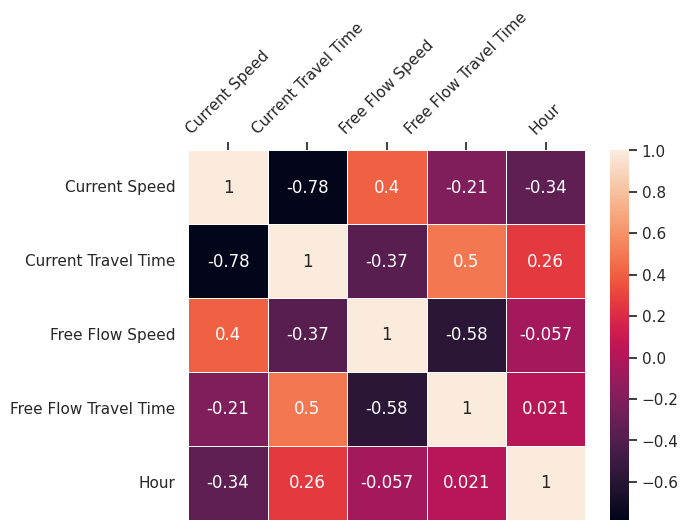

In [7]:
labels=["Current Speed", "Current Travel Time", "Free Flow Speed", "Free Flow Travel Time", "Hour"]
ax = sns.heatmap(speeds_and_times_df_corr,xticklabels=labels,yticklabels=labels,annot=True,linewidth=0.5)
ax.xaxis.tick_top()
plt.xticks(rotation=45)
plt.savefig("./plots/070_speed_travel_time_correlation.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/070_speed_travel_time_correlation.png", bbox_inches="tight")
plt.savefig("./plots/070_speed_travel_time_correlation.pdf", bbox_inches="tight")

# ANOVA (Analysis Of Variance) test
- Null hypothesis: numerical and categorical values are not correlated
- P-value: The probability of Null hypothesis being true
- Accept Null hypothesis if P-value>0.05. Means variables are NOT correlated
- Reject Null hypothesis if P-value<0.05. Means variables are correlated

In [8]:
from scipy.stats import f_oneway

## Between day of week (categorical) and current speed (numerical)

In [9]:
category_group_lists = df[["currentSpeed","dow_name"]].groupby('dow_name')['currentSpeed'].apply(list)
anova_results = f_oneway(*category_group_lists)
print("P-value:",anova_results[1])
print("Speed and day of week are NOT correlated") if anova_results[1] > 0.05 else print("Speed and day of week ARE correlated")

P-value: 2.6497931562618125e-145
Speed and day of week ARE correlated


## Between day of week (categorical) and current travel time (numerical)

In [10]:
category_group_lists = df[["currentTravelTime","dow_name"]].groupby('dow_name')['currentTravelTime'].apply(list)
anova_results = f_oneway(*category_group_lists)
print("P-value:",anova_results[1])
print("Travel time and day of week are NOT correlated") if anova_results[1] > 0.05 else print("Travel time and day of week ARE correlated")

P-value: 1.1031271827595424e-96
Travel time and day of week ARE correlated


## Between month (categorical) and current speed (numerical)

In [11]:
category_group_lists = df[["currentSpeed","month_name"]].groupby('month_name')['currentSpeed'].apply(list)
anova_results = f_oneway(*category_group_lists)
print("P-value:",anova_results[1])
print("Speed and month are NOT correlated") if anova_results[1] > 0.05 else print("Speed and month ARE correlated")

P-value: 0.0
Speed and month ARE correlated


## Between month (categorical) and current travel time (numerical)

In [12]:
category_group_lists = df[["currentTravelTime","month_name"]].groupby('month_name')['currentTravelTime'].apply(list)
anova_results = f_oneway(*category_group_lists)
print("P-value:",anova_results[1])
print("Travel time and month are NOT correlated") if anova_results[1] > 0.05 else print("Travel time and month ARE correlated")

P-value: 6.076600540782933e-274
Travel time and month ARE correlated


## Between day of week & month (categorical) and current speed (numerical)

In [13]:
category_group_lists = df[["currentSpeed","dow_name", "month_name"]].groupby(["dow_name", "month_name"])['currentSpeed'].apply(list)

anova_results = f_oneway(*category_group_lists)

print("P-value:",anova_results[1])
print("Speed and day of week & month NOT correlated") if anova_results[1] > 0.05 else print("Speed and day of week & month ARE correlated")

P-value: 0.0
Speed and day of week & month ARE correlated


## Between day of week & month (categorical) and current travel time (numerical)

In [14]:
category_group_lists = df[["currentTravelTime","dow_name", "month_name"]].groupby(["dow_name", "month_name"])['currentTravelTime'].apply(list)

anova_results = f_oneway(*category_group_lists)

print("P-value:",anova_results[1])
print("Travel time and day of week & month NOT correlated") if anova_results[1] > 0.05 else print("Travel time and day of week & month ARE correlated")

P-value: 0.0
Travel time and day of week & month ARE correlated
